# Pymaceuticals Inc.
---

### Analysis

Effective Drug Regimens:
The drugs Capomulin and Ramicane have lower median tumor volumes compared to other regimens, suggesting they are more effective in reducing tumor growth.

The supporting analysis for both drugs show tighter distributions in the box plots, indicating consistent performance in reducing tumor sizes with fewer outliers, which may imply reliable effectiveness.


Outliers and Treatment Variability:
Outliers were detected in the tumor volumes for Infubinol and Ceftamin, suggesting that these drugs may have less consistent effects on tumor reduction or that individual mice responded differently.

This implies that that these outliers might point to variable efficacy for these treatments or potential differences in sensitivity to the drug regimens.

Gender Distribution:
The gender distribution of the mice is relatively balanced across the dataset, ensuring that gender does not skew results. The pie charts validate that both male and female mice are represented fairly.

Mouse Weight and Tumor Volume Correlation:
There is a  strong positive correlation (correlation coefficient close to 1) was found between mouse weight and average tumor volume within the Capomulin treatment group. The linear regression model suggests that, on average, larger mice have higher tumor volumes. This relationship could be biologically relevant and may warrant further exploration to determine if it impacts drug efficacy.

Tumor Volume Change Over Time:
Observation: A line plot tracking a single Capomulin-treated mouse showed a clear reduction in tumor volume over time, reinforcing the drug’s potential effectiveness. This individual case study highlights the drug’s capacity to slow down or reduce tumor growth, which aligns with Capomulin’s overall performance in the study.

Suggested Highlights for the Report
1. Capomulin and Ramicane as top-performing regimens with lower tumor volumes and fewer outliers.
2. Inconsistencies in Infubinol and Ceftamin regimens, as shown by the presence of outliers.
3. Positive correlation between weight and tumor volume in Capomulin, suggesting a possible link between weight and tumor growth that may influence treatment strategies.
4. Case Study of a Capomulin-treated Mouse showing tumor reduction over time, providing real-time insight into drug effectiveness. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_merged = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_merged["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
find_duplicated_rows = study_data_merged.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicated_mice = study_data_merged.loc[find_duplicated_rows,'Mouse ID'].unique()
duplicated_mice

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = study_data_merged[study_data_merged['Mouse ID'].isin(duplicated_mice)==False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
means = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variances = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdevs = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":stdevs,
                              "Tumor Volume Std. Err.":sems})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

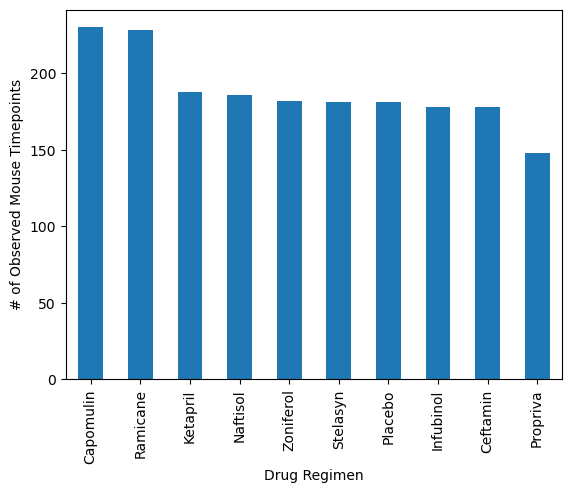

In [7]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = clean_data['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

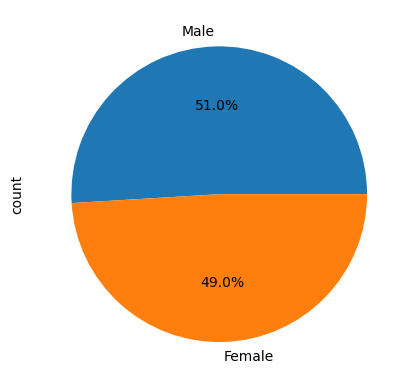

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = clean_data.Sex.value_counts()
counts.plot(kind="pie",autopct='%.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

last_tumor = clean_data.groupby(["Mouse ID"])['Timepoint'].max()
last_tumor = last_tumor.reset_index()
print(last_tumor)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data_with_result = last_tumor.merge(clean_data, on=['Mouse ID','Timepoint'], how="left")
print(merged_data_with_result)

    Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
243     z435         10
244     z578         45
245     z581         45
246     z795         45
247     z969         45

[248 rows x 2 columns]
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen   
0       a203         45           67.973419                 2    Infubinol  \
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0   

In [10]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data_with_result.loc[merged_data_with_result["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


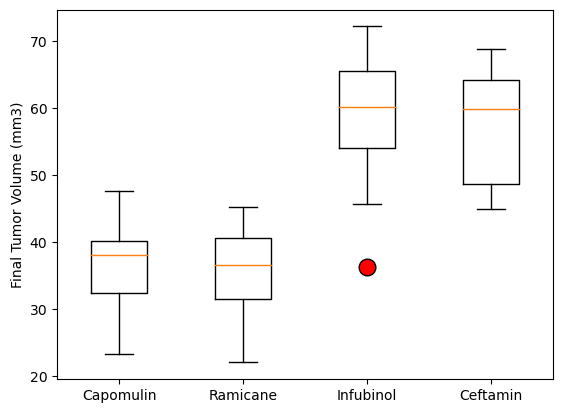

In [11]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
mark_outlier_red = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops=mark_outlier_red)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

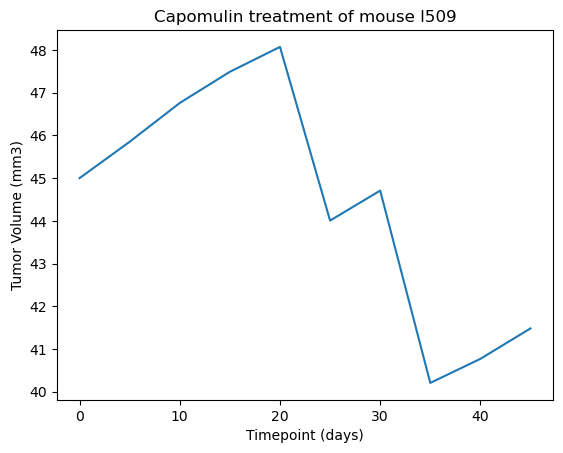

In [12]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

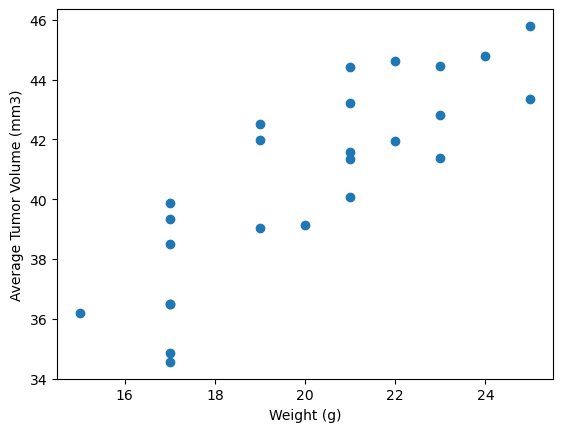

In [13]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


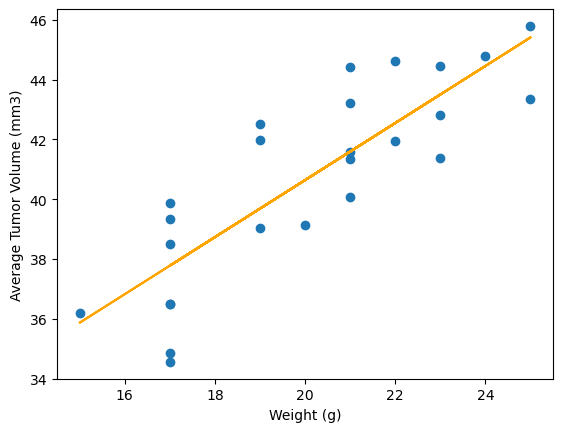

In [14]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="Orange")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()